In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [5]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [6]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [21]:
df2 = df.drop_duplicates(keep='first')
df2

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [22]:
# Clean data
df2 = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]

In [23]:
df2.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

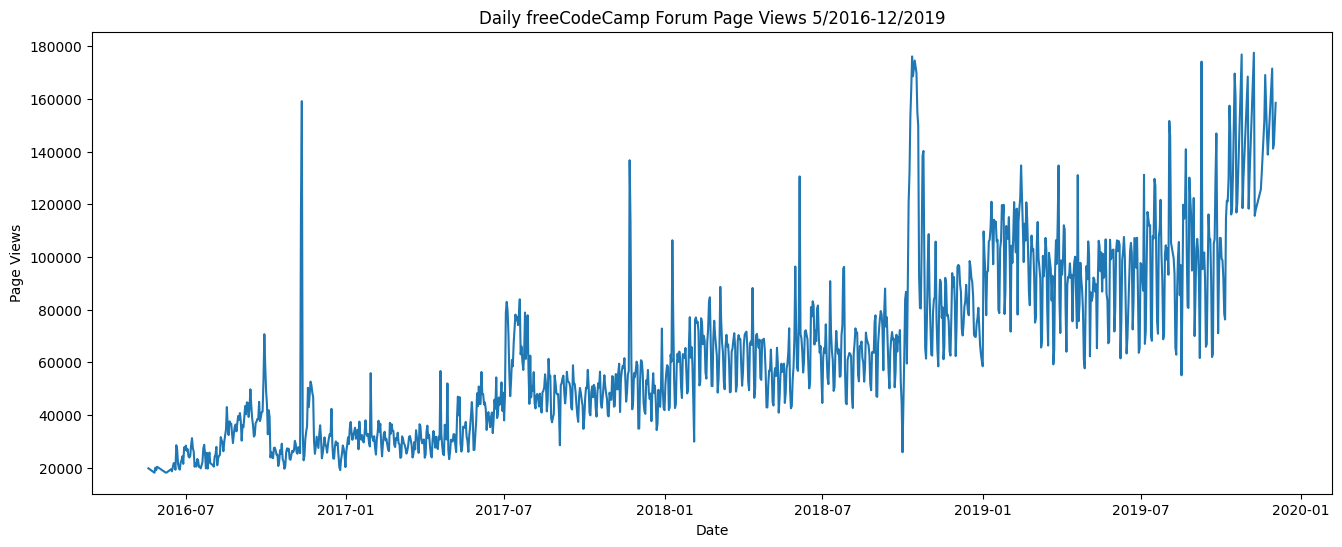

In [13]:
 # Draw line plot
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [14]:
# Copy and modify data for monthly bar plot
df_bar = df.copy().reset_index()
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

In [15]:
# It should show average daily page views for each month grouped by year. 
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()#.reset_index()
df_bar = df_bar.unstack()
#columns
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

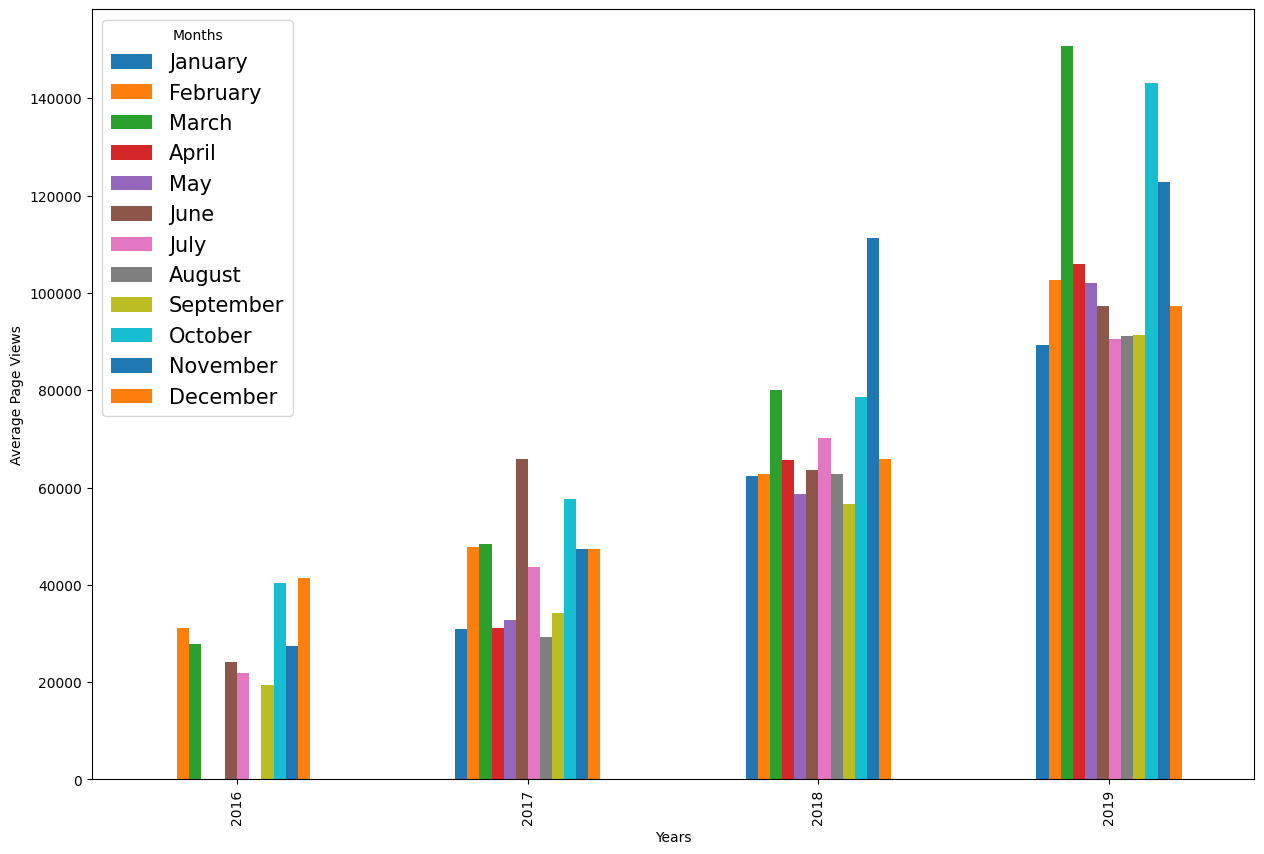

In [18]:
# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure
plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title= 'Months', fontsize = 15)

In [19]:
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

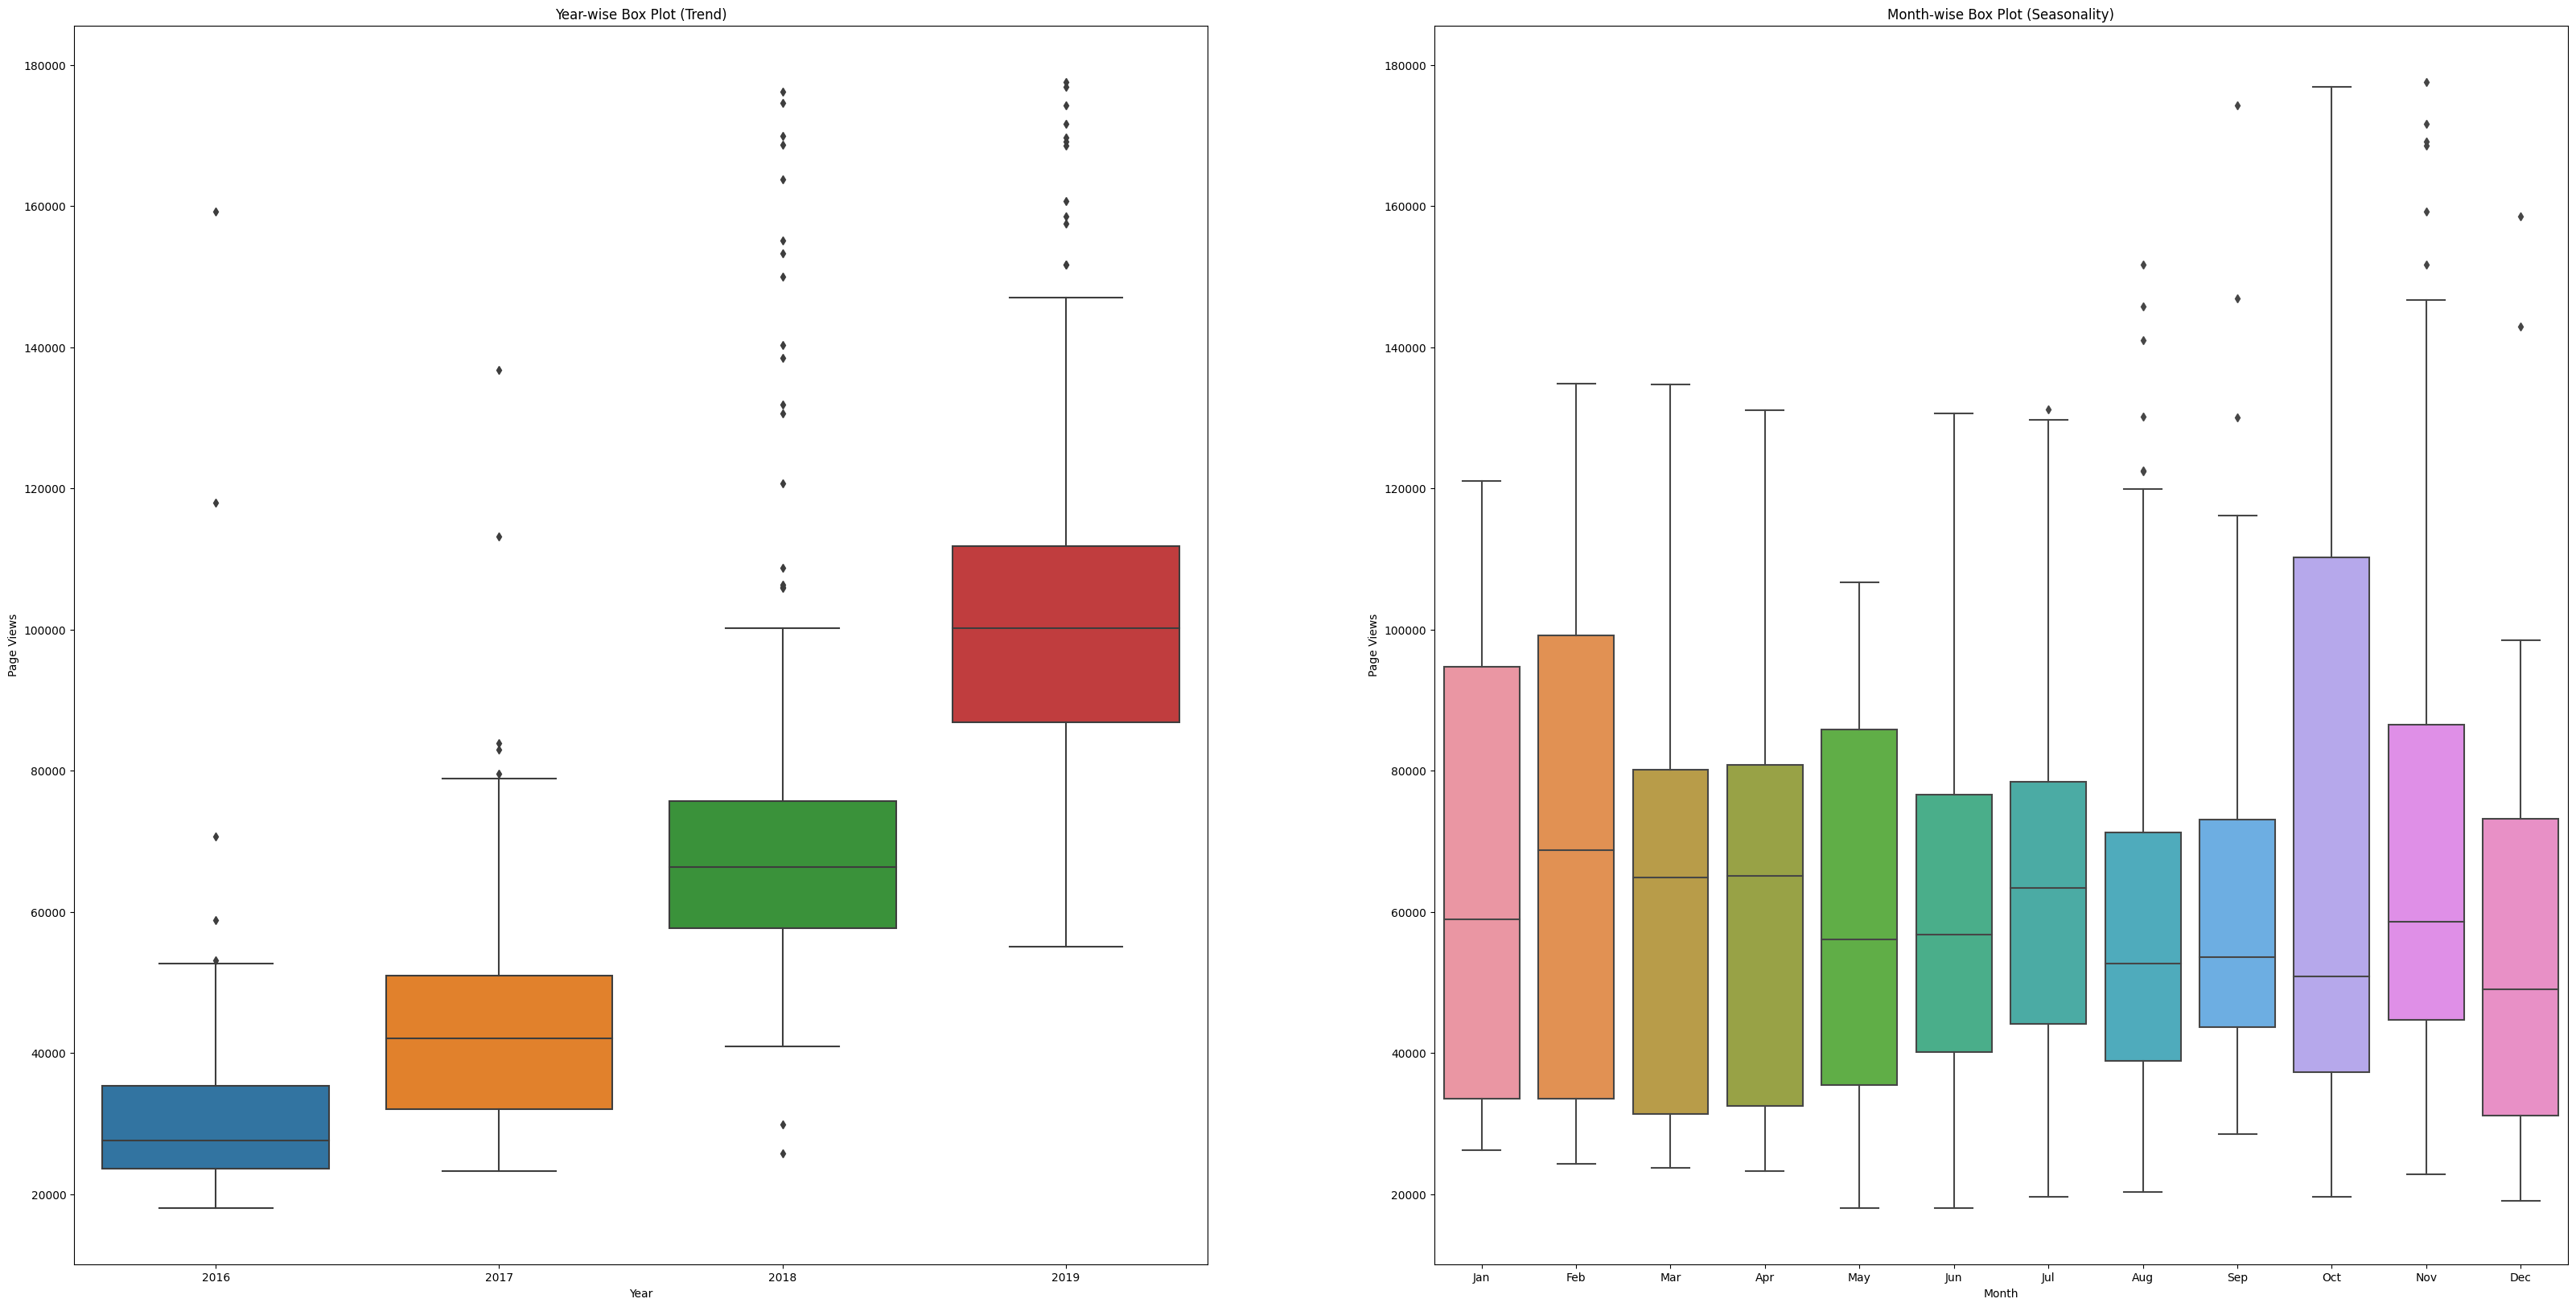

In [20]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
sns.boxplot(ax=ax1, x="year", y= "value", data=df_box) 
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")
    
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
sns.boxplot(ax=ax2, x="month", y= "value", data=df_box, order = month_order)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
    